In [6]:
# for data input reading
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt  #3.3.2
import seaborn as sns  #0.11.1
import folium  #0.14.0
from folium import plugins
import plotly.express as px  #5.1.0

# for simple routing
import osmnx as ox
import networkx as nx

# import function to transform addresses into geographical coordinates
import main as m

In [7]:
# Considering two addresses in Paris
work_address_1 = "20 Pl. de la Défense, 92800, Puteaux, France"
work_address_2 = "111 Quai du Président Roosevelt, 92130 Issy-les-Moulineaux, France"

In [8]:
# addresses into geo coordinates
gc_1 = m.get_coordinates(work_address_1)
gc_2 = m.get_coordinates(work_address_2)

In [9]:
# Value of geo coordinates
print("geo coordinates loic : ",gc_1)
print("geo coordinates kimi : ",gc_2)

geo coordinates loic :  (48.89, 2.24)
geo coordinates kimi :  (48.83, 2.26)


In [10]:
print(gc_1[0])

48.89


In [11]:
# creating pandas dataframe to stock the value
dtf = pd.DataFrame(data={'id': [0, 1],
                         'City': ['Paris', 'Paris'], 
                         'Street Address': [work_address_1, work_address_2],
                         'x': [gc_1[0],gc_2[0]],
                         'y': [gc_1[1],gc_2[1]]})

dtf

,id,City,Street Address,x,y
0,0,Paris,"20 Pl. de la Défense, 92800, Puteaux, France",48.89,2.24
1,1,Paris,"111 Quai du Président Roosevelt, 92130 Issy-le...",48.83,2.26


In [12]:
# Visualisation on the map
# setup
data = dtf.copy()
color = "id"  #color based on this column
lst_colors = ["red", "blue"]
popup = "id" #popup based on this column
  
# base map
map_ = folium.Map(location=gc_1, tiles="cartodbpositron", zoom_start=11)

# add colors
lst_elements = sorted(list(data[color].unique()))
print(lst_elements)
data["color"] = data[color].apply(lambda x: 
                  lst_colors[lst_elements.index(x)])

# add popup
data.apply(lambda row: 
    folium.CircleMarker(
            location=[row["x"],row["y"]], popup=row[popup],
            color=row["color"], fill=True, radius=5).add_to(map_), 
    axis=1)

# add full-screen button
plugins.Fullscreen(position="topright", title="Expand", 
      title_cancel="Exit", force_separate_button=True).add_to(map_)

# add map style config
layers = ["cartodbpositron", "openstreetmap", "Stamen Terrain", 
          "Stamen Water Color", "Stamen Toner", "cartodbdark_matter"]
for tile in layers:
    folium.TileLayer(tile).add_to(map_)
    
folium.LayerControl(position='bottomright').add_to(map_)

# show
map_

[0, 1]


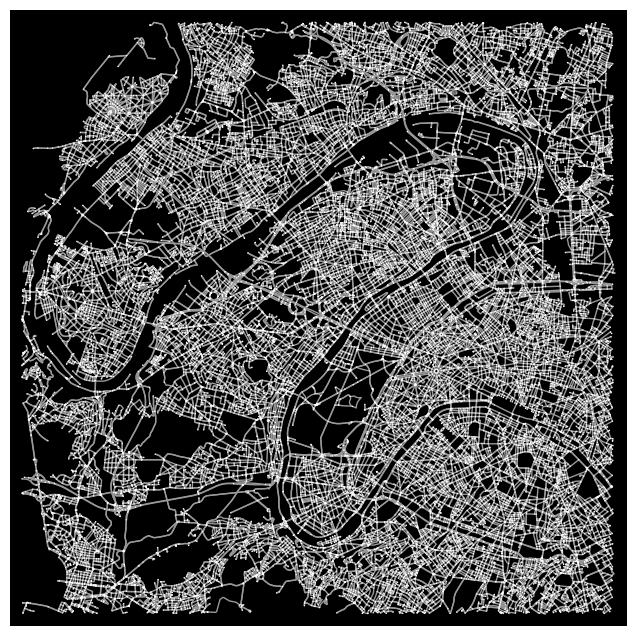

In [13]:
# create network graph
G = ox.graph_from_point(gc_1, dist=10000, 
        network_type="drive")  #'drive', 'bike', 'walk'
G = ox.add_edge_speeds(G)
G = ox.add_edge_travel_times(G)

# plot
fig, ax = ox.plot_graph(G, bgcolor="black", node_size=1, 
        node_color="white", figsize=(16,8))

In [18]:
# Variable nodes
print(gc_1, "&", gc_2)
start_node = ox.distance.nearest_nodes(G, Y=gc_1[0], X=gc_1[1])
end_node = ox.distance.nearest_nodes(G, Y=gc_2[0], X=gc_2[1])
print("nodes: from", start_node, "--> to", end_node)

(48.89, 2.24) & (48.83, 2.26)
nodes: from 592647548 --> to 366103208


[592647548, 471062048, 582756201, 589130308, 589130311, 589130254, 417218176, 6054784564, 27332099, 27332875, 471825681, 429283009, 429282355, 537242, 429281515, 471826994, 27336487, 568760458, 568760439, 417299170, 27415722, 25075950, 27415742, 25075982, 25075988, 25077040, 25077273, 25077285, 25077305, 25077702, 25077712, 25077720, 208913146, 208912939, 25077734, 180296150, 180296152, 180296377, 180269745, 180283729, 180283627, 366106554, 7011053985, 366103208]


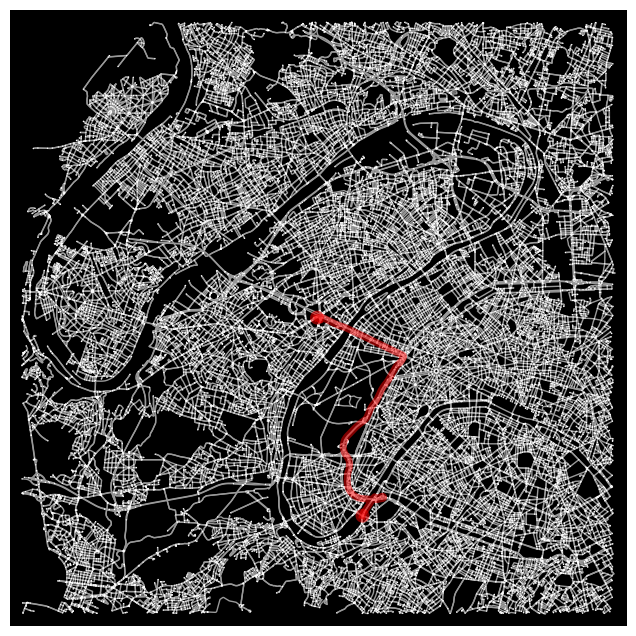

In [19]:
# calculate shortest path
path_lenght = nx.shortest_path(G, source=start_node, target=end_node, 
                                method='dijkstra', weight='lenght')     
print(path_lenght)

path_time = nx.shortest_path(G, source=start_node, target=end_node, 
                              method='dijkstra', weight='travel_time')  

# plot on the graph
fig, ax = ox.plot_graph_routes(G, routes=[path_lenght, path_time], 
                              route_colors=["red","blue"], 
                              route_linewidth=5, node_size=1, 
                              bgcolor='black', node_color="white", 
                              figsize=(16,8))